# Mid-Term Project
Overview
Use Medicare CCLF Claims from Syntegra dataset to answer key business questions
Extra credit for building up on the questions below (additional questions + answers)
One Jupyter notebook solution with clear Python code and all cell outputs available
At least two data quality checks

Step 0. Prepare raw input datasets
Here we will 1) load original datasets, 2) remove unused columns, 3) de-duplicate rows, and 4) join datasets, not necessarily in this order

Assumptions:

Claim ID (cur_clm_uniq_id) represents one claim, which may or may not have more than one code (code could be HCPCS/CPT, diagnosis, procedure...)
There is a one-to-many relationship between patient IDs (bene_mbi_id) and claim IDs (cur_clm_uniq_id), i.e. each claim is unique to one patient, but one patient can have more than one claim

0.1 Import Required Packages 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Additional imports required
from datetime import datetime

In [2]:
# Turn off the automatic setting that redacts the columns/rows from the dataframe output
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 200)

0.2 Load & select columns to be used from raw (original) datasets

In [15]:
# Load claims header dataset
parta_claims_header_raw_df = pd.read_csv(r"C:/Users/edidi/Downloads/inputs_datasets/parta_claims_header_raw (1).csv")
parta_claims_header_raw_df.sort_values(by=['cur_clm_uniq_id'])

,cur_clm_uniq_id,prvdr_oscar_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_bill_fac_type_cd,clm_bill_clsfctn_cd,prncpl_dgns_cd,admtg_dgns_cd,clm_mdcr_npmt_rsn_cd,clm_pmt_amt,clm_nch_prmry_pyr_cd,prvdr_fac_fips_st_cd,bene_ptnt_stus_cd,dgns_drg_cd,clm_op_srvc_type_cd,fac_prvdr_npi_num,oprtg_prvdr_npi_num,atndg_prvdr_npi_num,othr_prvdr_npi_num,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,bene_eqtbl_bic_hicn_num,clm_admsn_type_cd,clm_admsn_src_cd,clm_bill_freq_cd,clm_query_cd,dgns_prcdr_icd_ind,clm_mdcr_instnl_tot_chrg_amt,clm_mdcr_ip_pps_cptl_ime_amt,clm_oprtnl_ime_amt,clm_mdcr_ip_pps_dsprprtnt_amt,clm_hipps_uncompd_care_amt,clm_oprtnl_dsprtnt_amt
510,100190,111821,1228,NaN,40,2018-06-10,2018-06-10,7,7,M1611,NaN,NaN,127.79,NaN,11,1,NaN,F,1780608992,NaN,1.972732e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,415.80,NaN,NaN,NaN,NaN,NaN
521,100402,100226,1261,NaN,60,2017-05-27,2017-06-02,1,1,K5733,K5733,NaN,10602.46,NaN,10,6,330.0,NaN,1689611501,NaN,1.285688e+09,NaN,NaN,NaN,NaN,NaN,1.0,1,1,3,0,70795.63,609.13,0.00,13.92,231.15,NaN
525,100464,360051,12978,NaN,40,2017-06-26,2017-06-26,1,3,R079,NaN,NaN,199.45,NaN,36,1,NaN,C,1073688354,NaN,1.982693e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,2709.80,NaN,NaN,NaN,NaN,NaN
536,100698,140276,11789,NaN,40,2017-07-28,2017-07-28,1,3,M545,NaN,NaN,85.25,NaN,14,1,NaN,C,1376521575,NaN,1.912991e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,115.00,NaN,NaN,NaN,NaN,NaN
540,100750,230216,12138,NaN,40,2018-01-13,2018-01-13,1,3,Z0289,NaN,N,0.00,NaN,23,9,NaN,C,1982685384,NaN,1.063442e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,226.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1698691,390145,10007,NaN,40,2016-12-11,2016-12-11,1,3,Z01818,NaN,NaN,43.01,NaN,39,1,NaN,C,1689691214,NaN,1.679505e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,235.00,NaN,NaN,NaN,NaN,NaN
4365,1698722,200021,10985,NaN,40,2018-06-16,2018-06-16,1,3,E782,NaN,NaN,179.09,NaN,20,1,NaN,C,1932164795,NaN,1.548289e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,1939.35,NaN,NaN,NaN,NaN,NaN
4366,1698935,210022,1297,NaN,40,2018-04-06,2018-04-06,1,3,I110,NaN,NaN,400.81,NaN,21,9,NaN,C,1205896446,NaN,1.922016e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,554.00,NaN,NaN,NaN,NaN,NaN
4367,1699005,100057,12194,NaN,40,2016-04-27,2016-04-27,1,3,I348,NaN,NaN,265.19,NaN,10,1,NaN,C,1821019571,NaN,1.437130e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,8423.00,NaN,NaN,NaN,NaN,NaN


Data Quality Check #1: If true, the original dataset was unique on claim ID

In [16]:
parta_claims_header_raw_df_count = parta_claims_header_raw_df.shape[0]
parta_claims_header_raw_uniq_clm_id_df = parta_claims_header_raw_df['cur_clm_uniq_id'].drop_duplicates()

parta_claims_header_raw_df_count == parta_claims_header_raw_uniq_clm_id_df.shape[0]

True

In [17]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
parta_claims_header_df = parta_claims_header_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'atndg_prvdr_npi_num', 
    'clm_from_dt', 'prncpl_dgns_cd', 'clm_pmt_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'atndg_prvdr_npi_num': 'npi_id'
    }
)
parta_claims_header_df

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt
0,1001595,10226,1.366492e+09,2018-02-28,M25551,259.01
1,1004555,10133,1.942275e+09,2018-11-02,Z9861,29.56
2,1011605,10163,1.578546e+09,2018-01-02,C439,45.88
3,1011758,1003,1.952368e+09,2018-06-12,R310,9.40
4,101424,10052,1.336125e+09,2016-04-13,L821,34.18
...,...,...,...,...,...,...
8621,999774,10367,NaN,2017-11-06,R072,374.08
8622,999808,10496,1.740225e+09,2017-07-19,R079,360.89
8623,999878,12160,1.497784e+09,2018-01-18,R5383,90.73
8624,999961,12090,1.083691e+09,2018-03-10,C73,329.44


Data Quality Check #2: If true, the filtered dataset did not have any duplicates

In [18]:
parta_claims_header_df_count = parta_claims_header_df.shape[0]

parta_claims_header_raw_df_count == parta_claims_header_df_count

True

Data Quality Check #3: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [19]:
parta_claims_header_df.loc[~parta_claims_header_df.prncpl_dgns_cd.notnull()]

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt


0.2.2 Load & select columns from Claims Revenue Center dataset

In [20]:
# Load Claims Revenue Center dataset
# Note this dataset has more than one record for each claim ID (cur_clm_uniq_id)
# Also note there are two sets of date columns, 
#  one for claim ID (clm_from/thru_dt) and one for claim line (clm_line_from/thru_dt)
parta_claims_revenue_center_detail_raw_df = pd.read_csv(
    "C:/Users/edidi/Downloads/inputs_datasets/parta_claims_revenue_center_detail_raw (1).csv",low_memory=False
)
parta_claims_revenue_center_detail_raw_df.sort_values(by=['cur_clm_uniq_id'])

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd
318,100073,1,12620,NaN,40,2018-12-02 00:00:00,2018-12-02 00:00:00,403,2018-12-02 00:00:00,77063,NaN,NaN,2018-12-02 00:00:00,2018-12-02 00:00:00,1,24.11,NaN,NaN,NaN,NaN,NaN,00000
383,100184,1,10080,NaN,40,2018-09-06 00:00:00,2018-09-06 00:00:00,1,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,2018-09-06 00:00:00,0,0.00,NaN,NaN,NaN,NaN,NaN,00000
384,100190,1,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,G0467,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,133.74,NaN,NaN,NaN,NaN,NaN,00000
385,100190,2,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,98960,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000
386,100190,3,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,J1100,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,4,0.00,NaN,NaN,NaN,NaN,NaN,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29896,1699197,2,1177,NaN,40,2016-05-22 00:00:00,2016-05-22 00:00:00,302,2016-05-22 00:00:00,86592,NaN,NaN,2016-05-22 00:00:00,2016-05-22 00:00:00,1,5.43,NaN,NaN,NaN,NaN,NaN,00000
29898,1699212,1,1262,NaN,60,2018-12-24 00:00:00,2018-12-25 00:00:00,730,NaN,NaN,NaN,NaN,2018-12-24 00:00:00,2018-12-25 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,00000
29901,1699236,3,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,370,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,2,0.00,NaN,NaN,NaN,NaN,NaN,00000
29899,1699236,1,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,258,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000


Data Quality Check #4: If the resulting dataframe is empty, it means there is no difference between columns 'clm_line_from_dt' and 'clm_from_dt' for all the rows¶

In [21]:
parta_claims_revenue_center_detail_raw_df.loc[
    ~(parta_claims_revenue_center_detail_raw_df['clm_line_from_dt'] 
      == parta_claims_revenue_center_detail_raw_df['clm_from_dt'])
]

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd


In [22]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Select 'clm_from_dt' as the column for claim dates since we want uniqueness on claim ID, not claim line
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_from_dt',
    'clm_line_hcpcs_cd', 'clm_line_cvrd_pd_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code'
    }
)
parta_claims_revenue_center_detail_df

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.00
1,1001595,10226,2018-02-28 00:00:00,G0283,9.67
7,1001595,10226,2018-02-28 00:00:00,G8978,0.00
8,1001595,10226,2018-02-28 00:00:00,G8979,0.00
10,1001595,10226,2018-02-28 00:00:00,97110,24.97
...,...,...,...,...,...
59414,999961,12090,2018-03-10 00:00:00,A9516,0.00
59415,999961,12090,2018-03-10 00:00:00,G8996,0.00
59416,999976,10768,2016-01-18 00:00:00,80053,11.37
59417,999976,10768,2016-01-18 00:00:00,80061,12.83


Data Quality Check #5: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [23]:
parta_claims_revenue_center_detail_df.loc[
    ~parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.0
25,1001595,10226,2018-02-28 00:00:00,NaN,0.0
29,1004555,10133,2018-11-02 00:00:00,NaN,0.0
30,1004904,10106,2018-02-26 00:00:00,NaN,0.0
32,100974,10042,2017-02-20 00:00:00,NaN,0.0
...,...,...,...,...,...
59369,999008,12473,2018-08-04 00:00:00,NaN,0.0
59402,999774,10367,2017-11-06 00:00:00,NaN,0.0
59407,999808,10496,2017-07-19 00:00:00,NaN,0.0
59410,999943,11021,2016-11-20 00:00:00,NaN,0.0


In [24]:
# Data Quality Check #5 failed, so remove rows with no HCPCS codes
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_df.loc[
    parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

In [27]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_claims_revenue_center_detail_df.loc[:,'claim_date'] = pd.to_datetime(
    parta_claims_revenue_center_detail_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_claims_revenue_center_detail_df




,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
1,1001595,10226,2018-02-28,G0283,9.67
7,1001595,10226,2018-02-28,G8978,0.00
8,1001595,10226,2018-02-28,G8979,0.00
10,1001595,10226,2018-02-28,97110,24.97
18,1001595,10226,2018-02-28,97140,20.33
...,...,...,...,...,...
59413,999961,12090,2018-03-10,78014,400.05
59414,999961,12090,2018-03-10,A9516,0.00
59415,999961,12090,2018-03-10,G8996,0.00
59416,999976,10768,2016-01-18,80053,11.37


Mini-Analysis #1: Find whether there are matching claims between Claim Header and Claims Revenue Center datasets

In [28]:
claims_header_unique_claims_df = parta_claims_header_df[[
    'claim_id'
]].drop_duplicates()

claims_header_unique_claims_df['header'] = 1

revenue_center_unique_claims_df = parta_claims_revenue_center_detail_df[[
    'claim_id'
]].drop_duplicates()

revenue_center_unique_claims_df['revenue'] = 1

joined_df1 = pd.merge(
    claims_header_unique_claims_df,
    revenue_center_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df1

,claim_id,header,revenue
0,1001595,1.0,1.0
1,1004555,1.0,1.0
2,1011605,1.0,1.0
3,1011758,1.0,1.0
4,101424,1.0,NaN
...,...,...,...
15721,999074,NaN,1.0
15722,999324,NaN,1.0
15723,999350,NaN,1.0
15724,999514,NaN,1.0


In [29]:
print('# of unique claims in Claims Header dataset: ' 
      + str(claims_header_unique_claims_df.shape[0])
     )
print('# of unique claims in Claims Revenue Center dataset: ' 
      + str(revenue_center_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header dataset: 8626
# of unique claims in Claims Revenue Center dataset: 13406


In [30]:
print('# of unique claims in Claims Header and Claims Revenue Center datasets combined: ' 
      + str(joined_df1.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only Claims Header dataset: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & ~(joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in only Claims Revenue Center dataset: ' 
      + str(joined_df1.loc[~(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in both Claims Header AND Claims Revenue Center datasets: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )

# of unique claims in Claims Header and Claims Revenue Center datasets combined: 15726
From combined list of unique claims - 
# of unique claims in only Claims Header dataset: 2320
# of unique claims in only Claims Revenue Center dataset: 7100
# of unique claims in both Claims Header AND Claims Revenue Center datasets: 6306


Conclusion: There are quite a number of claims available in both datasets, so join them on claim ID as an outer join to get all possible claims without duplicates

0.2.3 Load & select columns from Diagnosis dataset

In [31]:
# Load the Diagnosis dataset
# Note that 'clm_from_dt' has some records with null values, but we need claim dates for all claims
parta_diagnosis_code_raw_df = pd.read_csv(r"C:\Users\edidi\Downloads\inputs_datasets\parta_diagnosis_code_raw  (1).csv")
parta_diagnosis_code_raw_df.sort_values(by=['cur_clm_uniq_id', 'clm_val_sqnc_num'])

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_prod_type_cd,clm_val_sqnc_num,clm_dgns_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_poa_ind,dgns_prcdr_icd_ind
244,100190,1228,NaN,40,NaN,1,M1611,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
243,100190,1228,NaN,40,NaN,2,M25572,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
246,100190,1228,NaN,40,NaN,3,M25551,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
245,100190,1228,NaN,40,NaN,4,M5136,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
366,100402,1261,NaN,60,NaN,11,E119,NaN,100256.0,2017-05-28 00:00:00,2017-06-02 00:00:00,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16232,1699102,11842,NaN,60,NaN,13,Z8673,NaN,330191.0,2017-01-31 00:00:00,2017-02-03 00:00:00,0,0
16236,1699137,10873,NaN,40,NaN,1,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16235,1699137,10873,NaN,40,NaN,2,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16237,1699155,11689,NaN,40,NaN,3,K219,NaN,NaN,NaN,2018-12-06 00:00:00,NaN,0


In [32]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Use 'clm_thru_dt' as claim date columns since 'clm_from_dt' has some nulls
parta_diagnosis_code_df = parta_diagnosis_code_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_thru_dt', 'clm_dgns_cd'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_thru_dt': 'claim_date'
    }
)
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30 00:00:00,K5289
1,1001595,10226,2018-02-28 00:00:00,M25551
2,1001595,10226,2018-02-28 00:00:00,M79604
3,1001865,10133,2018-09-14 00:00:00,G459
4,1004555,10133,2018-11-02 00:00:00,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18 00:00:00,N390
32048,999943,11021,2016-11-20 00:00:00,M545
32049,999961,12090,2018-03-10 00:00:00,C73
32050,999962,11030,2018-07-17 00:00:00,G8194


Data Quality Check #6: If the resulting dataframe is empty, it means all the records have values for 'clm_thru_dt' (if it's not empty it should be removed now since without claim dates it'd be difficult to use)

In [33]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.claim_date.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


Data Quality Check #7: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [34]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.clm_dgns_cd.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


In [35]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_diagnosis_code_df['claim_date'] = pd.to_datetime(
    parta_diagnosis_code_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30,K5289
1,1001595,10226,2018-02-28,M25551
2,1001595,10226,2018-02-28,M79604
3,1001865,10133,2018-09-14,G459
4,1004555,10133,2018-11-02,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18,N390
32048,999943,11021,2016-11-20,M545
32049,999961,12090,2018-03-10,C73
32050,999962,11030,2018-07-17,G8194


Mini-Analysis #2: Find whether there are matching claims between above two datasets and the Diagnosis dataset

In [36]:
diagnosis_unique_claims_df = parta_diagnosis_code_df[[
    'claim_id'
]].drop_duplicates()

diagnosis_unique_claims_df['diagnosis'] = 1

joined_df2 = pd.merge(
    joined_df1,
    diagnosis_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df2

,claim_id,header,revenue,diagnosis
0,1001595,1.0,1.0,1.0
1,1004555,1.0,1.0,1.0
2,1011605,1.0,1.0,1.0
3,1011758,1.0,1.0,1.0
4,101424,1.0,NaN,NaN
...,...,...,...,...
19452,998726,NaN,NaN,1.0
19453,999064,NaN,NaN,1.0
19454,999766,NaN,NaN,1.0
19455,999799,NaN,NaN,1.0


In [37]:
print('# of unique claims in Claims Header+Claims Revenue Center datasets: ' 
      + str(joined_df1.shape[0])
     )
print('# of unique claims in Diagnosis dataset: ' 
      + str(diagnosis_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center datasets: 15726
# of unique claims in Diagnosis dataset: 13432


In [38]:
print('# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: ' 
      + str(joined_df2.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims only in either Claims Header or Claims Revenue Center datasets: ' 
      + str(joined_df2.loc[
          ((joined_df2.header == 1) | (joined_df2.revenue == 1))
          & ~(joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in only Diagnosis dataset: ' 
      + str(joined_df2.loc[
          (~(joined_df2.header == 1) & ~(joined_df2.revenue == 1))
          & (joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in all three datasets: ' 
      + str(joined_df2.loc[
          (joined_df2.header == 1) & (joined_df2.revenue == 1) & (joined_df2.diagnosis == 1)
      ].shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: 19457
From combined list of unique claims - 
# of unique claims only in either Claims Header or Claims Revenue Center datasets: 6025
# of unique claims in only Diagnosis dataset: 3731
# of unique claims in all three datasets: 5266


Conclusion: There are quite a number of claims available in all three datasets, so join diagnosis to the first two datasets on claim ID as an outer join to get all possible claims without duplicates

0.2.4 Load & select columns from Procedure dataset

In [39]:
# Load the Procedure dataset
parta_procedure_code_df = pd.read_csv(r"C:\Users\edidi\Downloads\inputs_datasets\parta_procedure_code_raw  (1).csv")
parta_procedure_code_df

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_val_sqnc_num,clm_prcdr_cd,clm_prcdr_prfrm_dt,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,dgns_prcdr_icd_ind
0,100402,1261,NaN,60,1,0DJD8ZZ,2017-05-31 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
1,100402,1261,NaN,60,2,0D9670Z,2017-05-29 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
2,100402,1261,NaN,60,3,0DJD8ZZ,2017-06-01 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
3,100402,1261,NaN,60,4,0DB78ZX,2017-05-30 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
4,1008371,1074,NaN,60,1,0T9B7ZZ,2016-12-03 00:00:00,NaN,140007,2016-12-02 00:00:00,2016-12-08 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,357821,10200,NaN,60,2,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
458,357821,10200,NaN,60,1,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
459,412998,10106,NaN,60,1,0SRC0J9,2016-12-09 00:00:00,NaN,250104,2016-12-09 00:00:00,2016-12-10 00:00:00,0
460,460114,10133,NaN,60,1,0QSH04Z,2018-05-17 00:00:00,NaN,150112,2018-05-07 00:00:00,2018-05-23 00:00:00,0


Conclusion: Don't join procedure dataset since the only useful info for sake of this analysis is the procedure codes and we won't be using them in our analysis

0.2.5 Load & select columns from DME dataset

In [40]:
# Load the DME dataset
partb_dme_raw_df = pd.read_csv(r"C:\Users\edidi\Downloads\inputs_datasets\partb_dme_raw  (1).csv")
partb_dme_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_prmry_pyr_cd,payto_prvdr_npi_num,ordrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_disp_cd
267,100441,1,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4256,3.24,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,3.98,1
268,100441,2,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,E0607,59.80,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,76.54,1
269,100441,3,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4253,38.57,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,49.92,1
270,100441,4,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4259,4.20,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,4.80,1
271,100441,5,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4258,2.27,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,2.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1696080,2,11689,NaN,82,2016-11-18,2016-11-18,P,12,2016-11-18,2016-11-18,A7038,0.00,NaN,1376599084,1.659342e+09,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
129,1696545,1,10046,NaN,82,2017-07-25,2017-07-25,R,12,2017-07-25,2017-07-25,E0570,6.30,NaN,1346347374,1.952397e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,8.12,1
1548,1696792,1,12086,NaN,82,2018-12-23,2018-12-23,P,12,2018-12-23,2018-12-23,A4604,35.58,NaN,1790823722,1.518936e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,48.17,1
1549,1697987,1,11074,NaN,82,2018-04-06,2018-04-06,P,12,2018-04-06,2018-04-06,A4253,27.92,NaN,1902842065,1.750382e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,33.28,1


In [41]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
partb_dme_df = partb_dme_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'ordrg_prvdr_npi_num',
    'clm_from_dt', 'clm_line_hcpcs_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'ordrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code',
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,18.75
...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,4.26


Data Quality Check #8: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [42]:
partb_dme_df.loc[~partb_dme_df.hcpcs_code.notnull()]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost


Mini-Analysis #3: Find whether there are matching claims between the first three datasets above and the DME dataset¶

In [43]:
dme_unique_claims_df = partb_dme_df[[
    'claim_id'
]].drop_duplicates()

dme_unique_claims_df['dme'] = 1

joined_df3 = pd.merge(
    joined_df2,
    dme_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df3

,claim_id,header,revenue,diagnosis,dme
0,1001595,1.0,1.0,1.0,NaN
1,1004555,1.0,1.0,1.0,NaN
2,1011605,1.0,1.0,1.0,NaN
3,1011758,1.0,1.0,1.0,NaN
4,101424,1.0,NaN,NaN,NaN
...,...,...,...,...,...
20960,994844,NaN,NaN,NaN,1.0
20961,994885,NaN,NaN,NaN,1.0
20962,998097,NaN,NaN,NaN,1.0
20963,999226,NaN,NaN,NaN,1.0


In [44]:
print('# of unique claims in first three datasets: ' 
      + str(joined_df2.shape[0])
     )
print('# of unique claims in DME dataset: ' 
      + str(dme_unique_claims_df.shape[0])
     )

# of unique claims in first three datasets: 19457
# of unique claims in DME dataset: 1508


In [45]:
print('# of unique claims in the four datasets combined: ' 
      + str(joined_df3.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & ~(joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in only DME dataset: ' 
      + str(joined_df3.loc[
          ~(joined_df3.header == 1) 
          & ~(joined_df3.revenue == 1)
          & ~(joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in all four datasets: ' 
      + str(joined_df3.loc[
          (joined_df3.header == 1) 
          & (joined_df3.revenue == 1)
          & (joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in DME and any of the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & (joined_df3.dme == 1)
      ].shape[0])
     )

# of unique claims in the four datasets combined: 20965
From combined list of unique claims - 
# of unique claims in only the first three datasets: 19457
# of unique claims in only DME dataset: 1508
# of unique claims in all four datasets: 0
# of unique claims in DME and any of the first three datasets: 0


Conclusion: None of the claims from DME is in any of the first three datasets, so append them to the output after joining the first three datasets

In [69]:
# Load the Physicians dataset
partb_physicians_raw_df = pd.read_csv(r"C:\Users\edidi\Downloads\inputs_datasets\partb_physicians_raw (1).csv")
partb_physicians_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,rndrg_prvdr_type_cd,rndrg_prvdr_fips_st_cd,clm_prvdr_spclty_cd,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_line_prmry_pyr_cd,clm_line_dgns_cd,clm_rndrg_prvdr_tax_num,rndrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_line_srvc_unit_qty,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_disp_cd,clm_dgns_1_cd,clm_dgns_2_cd,clm_dgns_3_cd,clm_dgns_4_cd,clm_dgns_5_cd,clm_dgns_6_cd,clm_dgns_7_cd,clm_dgns_8_cd,dgns_prcdr_icd_ind,clm_dgns_9_cd,clm_dgns_10_cd,clm_dgns_11_cd,clm_dgns_12_cd,hcpcs_betos_cd
520,100020,1,1070,NaN,71,2016-10-04,2016-10-04,5,36,69,5,81,2016-10-04,2016-10-04,85610,5.10,NaN,I482,NaN,1.619972e+09,1,A,NaN,NaN,NaN,NaN,NaN,5.49,1.0,NaN,NaN,NaN,NaN,NaN,1,I482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1H
525,100024,1,11654,NaN,71,2016-12-10,2016-12-10,1,39,26,T,11,2016-12-10,2016-12-10,90834,61.17,NaN,F319,NaN,1.811965e+09,1,A,NaN,NaN,NaN,NaN,NaN,79.36,1.0,NaN,NaN,NaN,NaN,NaN,1,F319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M5B
529,100030,1,12052,NaN,71,2017-04-15,2017-04-15,1,5,06,5,21,2017-04-15,2017-04-15,93010,6.92,NaN,R001,NaN,1.336344e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.53,1.0,NaN,NaN,NaN,NaN,NaN,1,R001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T2A
555,100038,1,12345,NaN,71,2018-07-02,2018-07-02,1,34,30,4,19,2018-07-02,2018-07-02,72158,89.30,NaN,M47816,NaN,1.295730e+09,1,A,NaN,NaN,NaN,NaN,NaN,112.57,1.0,26,NaN,NaN,NaN,NaN,1,M47816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I2D
592,100061,1,10252,NaN,71,2016-07-04,2016-07-04,1,33,48,1,11,2016-07-04,2016-07-04,99213,65.83,NaN,L03032,NaN,1.861493e+09,1,A,NaN,NaN,NaN,NaN,NaN,82.36,1.0,NaN,NaN,NaN,NaN,NaN,1,L03032,B351,L853,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,1699176,1,1008,NaN,71,2018-10-18,2018-10-18,1,18,29,1,21,2018-10-18,2018-10-18,99232,56.62,NaN,J9601,NaN,1.730182e+09,1,A,NaN,NaN,NaN,NaN,NaN,73.06,1.0,NaN,NaN,NaN,NaN,NaN,1,J9601,J810,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M2B
66051,1699182,1,13175,NaN,71,2016-11-21,2016-11-21,5,31,69,5,81,2016-11-21,2016-11-21,80053,7.43,NaN,E782,NaN,1.063497e+09,1,A,NaN,NaN,NaN,NaN,NaN,7.87,1.0,NaN,NaN,NaN,NaN,NaN,1,E782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1B
66052,1699186,1,10710,NaN,71,2016-01-18,2016-01-18,1,14,30,4,23,2016-01-18,2016-01-18,73110,7.41,NaN,S52502A,NaN,1.427027e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.97,1.0,26,LT,NaN,NaN,NaN,1,S52502A,S52602A,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I1B
66053,1699204,1,11540,NaN,71,2018-05-08,2018-05-08,1,28,13,1,11,2018-05-08,2018-05-08,99214,80.42,NaN,M5116,NaN,1.275519e+09,1,A,NaN,NaN,NaN,NaN,NaN,101.91,1.0,NaN,NaN,NaN,NaN,NaN,1,M5116,M47816,M48061,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B


In [47]:
#Possible expansio of analysis - keep as side note

partb_physicians_raw_df.groupby('clm_pos_cd').agg(
    uniq_clm_cnt=('cur_clm_uniq_id', 'nunique')
).sort_values(by='uniq_clm_cnt', ascending=False)

,uniq_clm_cnt
clm_pos_cd,
11,34209
81,17512
22,7218
21,6171
23,4505
24,1912
41,1619
19,1435
31,891


In [70]:
# Select only the desired columns and remove duplicates if any
partb_physicians_df = partb_physicians_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'rndrg_prvdr_npi_num', 'clm_from_dt', 
    'clm_line_hcpcs_cd', 'clm_line_dgns_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'rndrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code', 
        'clm_line_dgns_cd': 'diagnosis_code', 
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_physicians_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100117,10046,1.073515e+09,2016-11-19,83861,H04123,0.00
1,1001777,10133,1.053398e+09,2016-12-15,99213,I480,69.50
2,1001907,10113,1.245238e+09,2017-02-09,11721,B351,43.37
3,1002867,10049,1.255316e+09,2017-09-23,88312,D0359,143.39
4,1002871,10026,1.265419e+09,2016-03-11,87086,N390,10.66
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


Data Quality Check #9: If the resulting dataframe is empty, it means all the records have HCPCS or diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [49]:
partb_physicians_df.loc[
    (~partb_physicians_df.hcpcs_code.notnull()) | (~partb_physicians_df.diagnosis_code.notnull())
]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost


Mini-Analysis #4: Find whether there are matching claims between above four datasets and the Physicians dataset

In [50]:
physicians_unique_claims_df = partb_physicians_df[[
    'claim_id'
]].drop_duplicates()

physicians_unique_claims_df['physicians'] = 1

joined_df4 = pd.merge(
    joined_df3,
    physicians_unique_claims_df,

    on='claim_id', how = 'outer'
)
joined_df4

,claim_id,header,revenue,diagnosis,dme,physicians
0,1001595,1.0,1.0,1.0,NaN,NaN
1,1004555,1.0,1.0,1.0,NaN,NaN
2,1011605,1.0,1.0,1.0,NaN,NaN
3,1011758,1.0,1.0,1.0,NaN,NaN
4,101424,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
97953,999905,NaN,NaN,NaN,NaN,1.0
97954,999908,NaN,NaN,NaN,NaN,1.0
97955,999916,NaN,NaN,NaN,NaN,1.0
97956,999919,NaN,NaN,NaN,NaN,1.0


In [51]:
print('# of unique claims in first four datasets: ' 
      + str(joined_df3.shape[0])
     )
print('# of unique claims in Physicians dataset: ' 
      + str(physicians_unique_claims_df.shape[0])
     )

# of unique claims in first four datasets: 20965
# of unique claims in Physicians dataset: 76993


In [52]:
print('# of unique claims in the five datasets combined: ' 
      + str(joined_df4.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & ~(joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in only Physicians dataset: ' 
      + str(joined_df4.loc[
          ~(joined_df4.header == 1) 
          & ~(joined_df4.revenue == 1)
          & ~(joined_df4.diagnosis == 1)
          & ~(joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in all five datasets: ' 
      + str(joined_df4.loc[
          (joined_df4.header == 1) 
          & (joined_df4.revenue == 1)
          & (joined_df4.diagnosis == 1)
          & (joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in Physicians and any of the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & (joined_df4.physicians == 1)
      ].shape[0])
     )

# of unique claims in the five datasets combined: 97958
From combined list of unique claims - 
# of unique claims in only the first four datasets: 20965
# of unique claims in only Physicians dataset: 76993
# of unique claims in all five datasets: 0
# of unique claims in Physicians and any of the first four datasets: 0


Conclusion: None of the claims from Physicians is in any of the first four datasets, so append them to the output after combining the first four datasets

0.2.7 Load & select columns from Patients dataset

In [53]:
# Load the Patients dataset
# For sake of simplicity in concept, beneficiary = patient
beneficiary_demographics_df = pd.read_csv(r"C:\Users\edidi\Downloads\inputs_datasets\beneficiary_demographics_raw (1).csv")
beneficiary_demographics_df

,bene_mbi_id,bene_member_month,bene_hic_num,bene_fips_state_cd,bene_fips_cnty_cd,bene_zip_cd,bene_dob,bene_sex_cd,bene_race_cd,bene_age,bene_mdcr_stus_cd,bene_dual_stus_cd,bene_death_dt,bene_rng_bgn_dt,bene_rng_end_dt,bene_1st_name,bene_midl_name,bene_last_name,bene_orgnl_entlmt_rsn_cd,bene_entlmt_buyin_ind,bene_part_a_enrlmt_bgn_dt,bene_part_b_enrlmt_bgn_dt,bene_line_1_adr,bene_line_2_adr,bene_line_3_adr,bene_line_4_adr,bene_line_5_adr,bene_line_6_adr,geo_zip_plc_name,geo_usps_state_cd,geo_zip5_cd,geo_zip4_cd
0,10,2016-01-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
1,10,2016-02-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
2,10,2016-03-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
3,10,2016-04-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
4,10,2016-05-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31179,13380,2018-02-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31180,13380,2018-03-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31181,13380,2018-04-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31182,13380,2018-05-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN


In [54]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
beneficiary_demographics_df = beneficiary_demographics_df[[
    'bene_mbi_id', 'bene_dob', 'bene_sex_cd'
]].drop_duplicates().rename(
    columns={
        'bene_mbi_id': 'patient_id',
        'bene_dob': 'patient_birth_date'
    }
)
beneficiary_demographics_df

,patient_id,patient_birth_date,bene_sex_cd
0,10,1945-05-16 00:00:00,1
34,10007,1956-01-04 00:00:00,2
63,10010,1932-12-03 00:00:00,2
95,10013,1952-08-23 00:00:00,2
131,10017,1984-11-23 00:00:00,1
...,...,...,...
31037,13374,1948-07-11 00:00:00,2
31072,13376,1952-11-28 00:00:00,2
31103,13377,1956-01-16 00:00:00,1
31122,13379,1926-12-10 00:00:00,2


In [55]:
# Gender code as identified by the CMS CCLF resource (1 = male, 2 = female, 0 = Unknown = N/A)
# Convert gender code into readable acronym and drop original column
beneficiary_demographics_df['patient_gender'] = ''
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 1, 'patient_gender'] = 'M'
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 2, 'patient_gender'] = 'F'
beneficiary_demographics_df = beneficiary_demographics_df.drop('bene_sex_cd', axis=1)
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16 00:00:00,M
34,10007,1956-01-04 00:00:00,F
63,10010,1932-12-03 00:00:00,F
95,10013,1952-08-23 00:00:00,F
131,10017,1984-11-23 00:00:00,M
...,...,...,...
31037,13374,1948-07-11 00:00:00,F
31072,13376,1952-11-28 00:00:00,F
31103,13377,1956-01-16 00:00:00,M
31122,13379,1926-12-10 00:00:00,F


In [56]:
# Update date format for patient birth dates to match that of other date columns
beneficiary_demographics_df['patient_birth_date'] = pd.to_datetime(
    beneficiary_demographics_df['patient_birth_date']
).dt.strftime('%Y-%m-%d')
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16,M
34,10007,1956-01-04,F
63,10010,1932-12-03,F
95,10013,1952-08-23,F
131,10017,1984-11-23,M
...,...,...,...
31037,13374,1948-07-11,F
31072,13376,1952-11-28,F
31103,13377,1956-01-16,M
31122,13379,1926-12-10,F


Mini-Analysis #5: Find whether there are matching patients between the claims datasets and the Patients dataset

In [57]:
claims_header_unique_patients_df = parta_claims_header_df[[
    'patient_id'
]].drop_duplicates()

claims_header_unique_patients_df['header'] = 1

revenue_center_unique_patients_df = parta_claims_revenue_center_detail_df[[
    'patient_id'
]].drop_duplicates()

revenue_center_unique_patients_df['revenue'] = 1

diagnosis_unique_patients_df = parta_diagnosis_code_df[[
    'patient_id'
]].drop_duplicates()

diagnosis_unique_patients_df['diagnosis'] = 1

dme_unique_patients_df = partb_dme_df[[
    'patient_id'
]].drop_duplicates()

dme_unique_patients_df['dme'] = 1

physicians_unique_patients_df = partb_physicians_df[[
    'patient_id'
]].drop_duplicates()

physicians_unique_patients_df['physicians'] = 1

beneficiary_unique_patients_df = beneficiary_demographics_df[[
    'patient_id'
]].drop_duplicates()

beneficiary_unique_patients_df['beneficiary'] = 1

joined_patients_df = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    claims_header_unique_patients_df,
                    revenue_center_unique_patients_df,
                    on='patient_id', how = 'outer'
                ),
                diagnosis_unique_patients_df,
                on='patient_id', how = 'outer'
            ),
            dme_unique_patients_df,
            on='patient_id', how = 'outer'
        ),
        physicians_unique_patients_df,
        on='patient_id', how = 'outer'
    ),
    beneficiary_unique_patients_df,
    on='patient_id', how = 'outer'
)

joined_patients_df

,patient_id,header,revenue,diagnosis,dme,physicians,beneficiary
0,10226,1.0,1.0,1.0,NaN,1.0,1
1,10133,1.0,1.0,1.0,1.0,1.0,1
2,10163,1.0,1.0,1.0,NaN,1.0,1
3,1003,1.0,1.0,1.0,NaN,1.0,1
4,10052,1.0,1.0,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...
995,12868,NaN,NaN,NaN,NaN,NaN,1
996,13001,NaN,NaN,NaN,NaN,NaN,1
997,13157,NaN,NaN,NaN,NaN,NaN,1
998,13298,NaN,NaN,NaN,NaN,NaN,1


In [58]:
print('# of unique patients in the five datasets combined: ' 
      + str(joined_patients_df.shape[0])
     )
print('From combined list of unique patients - ')
print('# of unique patients in only the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & ~(joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in only Beneficiary dataset: ' 
      + str(joined_patients_df.loc[
          ~(joined_patients_df.header == 1) 
          & ~(joined_patients_df.revenue == 1)
          & ~(joined_patients_df.diagnosis == 1)
          & ~(joined_patients_df.dme == 1)
          & ~(joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in all five datasets: ' 
      + str(joined_patients_df.loc[
          (joined_patients_df.header == 1) 
          & (joined_patients_df.revenue == 1)
          & (joined_patients_df.diagnosis == 1)
          & (joined_patients_df.dme == 1)
          & (joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in Beneficiary and any of the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )

# of unique patients in the five datasets combined: 1000
From combined list of unique patients - 
# of unique patients in only the claims datasets: 0
# of unique patients in only Beneficiary dataset: 38
# of unique patients in all five datasets: 276
# of unique patients in Beneficiary and any of the claims datasets: 962


Conclusion: Most of the patients have some claims, so we can join the beneficiary dataset to the claims to get some of the patient demographics, i.e. age and gender

0.3 Combine all datasets
0.3.1. Join datasets with common records

In [59]:
# Join Claims Header and Claims Revenue Center datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    parta_claims_header_df,
    parta_claims_revenue_center_detail_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt
22501,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11
1281,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,98960,0.00
1285,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00
1284,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J2270,0.00
1283,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1885,0.00
...,...,...,...,...,...,...,...,...
30555,1699195,10958,NaN,2017-04-19,NaN,NaN,00810,0.00
30556,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00
30557,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00
30558,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43


In [60]:
# Join Medicare and Diagnosis datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    medicare_df,
    parta_diagnosis_code_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,clm_dgns_cd
62201,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11,NaN
3396,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M5136
3395,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M1611
3394,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M25572
3393,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J2270,0.00,M25551
...,...,...,...,...,...,...,...,...,...
79460,1699195,10958,NaN,2017-04-19,NaN,NaN,88342,0.00,NaN
79461,1699195,10958,NaN,2017-04-19,NaN,NaN,43239,1275.58,NaN
79464,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00,NaN
79465,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43,NaN


In [61]:
# Since Claims Header dataset has some principal diagnosis codes and the Diagnosis dataset 
#  supplements them with additional codes wherever possible, 
#  coalesce them with preference to the principal code from Claim Header dataset
# Once the diagnosis codes are combined into one column, remove the older columns and any duplicates
medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]
medicare_df = medicare_df.drop(['prncpl_dgns_cd', 'clm_dgns_cd'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code
62201,100073,12620,NaN,2018-12-02,NaN,77063,24.11,NaN
3386,100190,1228,1.972732e+09,2018-06-10,127.79,J1885,0.00,M1611
3378,100190,1228,1.972732e+09,2018-06-10,127.79,98960,0.00,M1611
3374,100190,1228,1.972732e+09,2018-06-10,127.79,G0467,133.74,M1611
3390,100190,1228,1.972732e+09,2018-06-10,127.79,J2270,0.00,M1611
3394,100190,1228,1.972732e+09,2018-06-10,127.79,99213,0.00,M1611
3382,100190,1228,1.972732e+09,2018-06-10,127.79,J1100,0.00,M1611
62426,100227,12140,NaN,2018-10-24,NaN,J2785,0.00,NaN
96298,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,E119
96297,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,R197


In [62]:
claims_header_revenue_diagnosis_df_count = medicare_df.shape[0]

0.3.2 Append datasets with no common records

In [63]:
# Create a dummy column for diagnosis code in DME dataset before appending so the list of columns match
partb_dme_df['diagnosis_code'] = np.nan
partb_dme_df = partb_dme_df[[
    'claim_id', 'patient_id', 'npi_id', 'claim_date', 'hcpcs_code', 'diagnosis_code', 'claim_cost'
]]
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,NaN,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,NaN,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,NaN,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,NaN,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,NaN,18.75
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [64]:
# Append DME dataset to the first three claims datasets
medicare_df = pd.concat([medicare_df, partb_dme_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code,claim_cost
0,1001595,10226,1.366492e+09,2018-02-28,259.01,G0283,9.67,M25551,NaN
2,1001595,10226,1.366492e+09,2018-02-28,259.01,G8978,0.00,M25551,NaN
4,1001595,10226,1.366492e+09,2018-02-28,259.01,G8979,0.00,M25551,NaN
6,1001595,10226,1.366492e+09,2018-02-28,259.01,97110,24.97,M25551,NaN
8,1001595,10226,1.366492e+09,2018-02-28,259.01,97140,20.33,M25551,NaN
...,...,...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,NaN,A4253,NaN,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,NaN,A4256,NaN,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,NaN,A4253,NaN,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,NaN,A4259,NaN,NaN,4.26


In [65]:
claims_header_revenue_diagnosis_dme_df_count = medicare_df.shape[0]

Data Quality Check #10: If True, we appended DME dataset to the first three claims datasets without any unexpected rows accruing

In [66]:
partb_dme_df_count = partb_dme_df.shape[0]
claims_w_dme_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis: ' 
      + str(claims_header_revenue_diagnosis_df_count))
print('Claim count for DME: ' + str(partb_dme_df_count))
print('Expected claim count after appending DME dataset: ' 
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count))
print('Actual claim count after appending DME dataset: '
     + str(claims_w_dme_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count == claims_w_dme_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis: 67138
Claim count for DME: 2731
Expected claim count after appending DME dataset: 69869
Actual claim count after appending DME dataset: 69869
Expected and actual claim count matches: True


In [68]:
# Append Physicians dataset to the first four claims datasets
medicare_df = pd.concat([medicare_df, partb_physicians_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code,claim_cost
0,1001595,10226,1.366492e+09,2018-02-28,259.01,G0283,9.67,M25551,NaN
2,1001595,10226,1.366492e+09,2018-02-28,259.01,G8978,0.00,M25551,NaN
4,1001595,10226,1.366492e+09,2018-02-28,259.01,G8979,0.00,M25551,NaN
6,1001595,10226,1.366492e+09,2018-02-28,259.01,97110,24.97,M25551,NaN
8,1001595,10226,1.366492e+09,2018-02-28,259.01,97140,20.33,M25551,NaN
...,...,...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,NaN,99214,NaN,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,NaN,90732,NaN,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,NaN,G0009,NaN,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,NaN,66984,NaN,H2512,838.19


Data Quality Check #11: If True, we appended Physicians dataset to the first four claims datasets without any unexpected rows accruing

In [71]:
partb_physicians_df_count = partb_physicians_df.shape[0]
claims_w_physicians_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis + DME: ' 
      + str(claims_header_revenue_diagnosis_dme_df_count))
print('Claim count for Physicians: ' + str(partb_physicians_df_count))
print('Expected claim count after appending Physicians dataset: ' 
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count))
print('Actual claim count after appending Physicians dataset: '
     + str(claims_w_physicians_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count 
           == claims_w_physicians_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis + DME: 69869
Claim count for Physicians: 128904
Expected claim count after appending Physicians dataset: 198773
Actual claim count after appending Physicians dataset: 327677
Expected and actual claim count matches: False


In [72]:
# Capture # records now to compare after joining patient details
medicare_claims_df_count = medicare_df.shape[0]

0.3.3 Join patient information

In [73]:
# Join claims data with patient details on patient ID
# Perform left join to only provide patient details for existing claims
medicare_df = pd.merge(
    medicare_df,
    beneficiary_demographics_df,
    on=['patient_id'], how='left'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code,claim_cost,patient_birth_date,patient_gender
70381,100020,1070,1.619972e+09,2016-10-04,NaN,85610,NaN,I482,5.49,1947-06-06,M
199285,100020,1070,1.619972e+09,2016-10-04,NaN,85610,NaN,I482,5.49,1947-06-06,M
199290,100024,11654,1.811965e+09,2016-12-10,NaN,90834,NaN,F319,79.36,1977-11-08,M
70386,100024,11654,1.811965e+09,2016-12-10,NaN,90834,NaN,F319,79.36,1977-11-08,M
199294,100030,12052,1.336344e+09,2017-04-15,NaN,93010,NaN,R001,8.53,1949-06-25,F
...,...,...,...,...,...,...,...,...,...,...,...
134980,1699204,11540,1.275519e+09,2018-05-08,NaN,99214,NaN,M5116,101.91,1952-03-08,F
263884,1699204,11540,1.275519e+09,2018-05-08,NaN,99214,NaN,M5116,101.91,1952-03-08,F
263885,1699222,11556,1.932188e+09,2016-03-16,NaN,J7060,NaN,I872,10.66,1955-02-04,F
134981,1699222,11556,1.932188e+09,2016-03-16,NaN,J7060,NaN,I872,10.66,1955-02-04,F


Data Quality Check #12: If True, we joined Patient dataset to the claims datasets without any unexpected rows accruing

In [74]:
# Check # records to ensure no extra records happened accidentally
medicare_claims_n_patient_info_df_count = medicare_df.shape[0]

print('Claims count before adding patient details: ' + str(medicare_claims_df_count))
print('Claims count after adding patient details: ' + str(medicare_claims_n_patient_info_df_count))
print('If True, no extra records were added accidentally from joining patient details into the claims: '
      + str(medicare_claims_df_count == medicare_claims_n_patient_info_df_count))

Claims count before adding patient details: 327677
Claims count after adding patient details: 327677
If True, no extra records were added accidentally from joining patient details into the claims: True


In [75]:
# Get claim year
medicare_df['claim_year'] = pd.to_datetime(
    medicare_df['claim_date']
).dt.strftime('%Y')
medicare_df

,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year
0,1001595,10226,1.366492e+09,2018-02-28,259.01,G0283,9.67,M25551,NaN,1951-02-27,M,2018
1,1001595,10226,1.366492e+09,2018-02-28,259.01,G8978,0.00,M25551,NaN,1951-02-27,M,2018
2,1001595,10226,1.366492e+09,2018-02-28,259.01,G8979,0.00,M25551,NaN,1951-02-27,M,2018
3,1001595,10226,1.366492e+09,2018-02-28,259.01,97110,24.97,M25551,NaN,1951-02-27,M,2018
4,1001595,10226,1.366492e+09,2018-02-28,259.01,97140,20.33,M25551,NaN,1951-02-27,M,2018
...,...,...,...,...,...,...,...,...,...,...,...,...
327672,999919,12345,1.962494e+09,2018-05-03,NaN,99214,NaN,E782,105.49,1947-01-28,F,2018
327673,999919,12345,1.962494e+09,2018-05-03,NaN,90732,NaN,Z23,108.14,1947-01-28,F,2018
327674,999919,12345,1.962494e+09,2018-05-03,NaN,G0009,NaN,Z23,19.91,1947-01-28,F,2018
327675,999959,11445,1.548250e+09,2016-09-24,NaN,66984,NaN,H2512,838.19,1945-04-03,F,2016


In [76]:
# Get patient age - subtract birthdate from claim date year to get the patient age at the time of claims
medicare_df['patient_birth_year'] = pd.to_datetime(
    medicare_df['patient_birth_date']
).dt.strftime('%Y')

medicare_df['patient_age'] = (
    medicare_df['claim_year'].astype('int') - medicare_df['patient_birth_year'].astype('int')
)

medicare_df = medicare_df.drop('patient_birth_year', axis=1)

medicare_df

,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age
0,1001595,10226,1.366492e+09,2018-02-28,259.01,G0283,9.67,M25551,NaN,1951-02-27,M,2018,67
1,1001595,10226,1.366492e+09,2018-02-28,259.01,G8978,0.00,M25551,NaN,1951-02-27,M,2018,67
2,1001595,10226,1.366492e+09,2018-02-28,259.01,G8979,0.00,M25551,NaN,1951-02-27,M,2018,67
3,1001595,10226,1.366492e+09,2018-02-28,259.01,97110,24.97,M25551,NaN,1951-02-27,M,2018,67
4,1001595,10226,1.366492e+09,2018-02-28,259.01,97140,20.33,M25551,NaN,1951-02-27,M,2018,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...
327672,999919,12345,1.962494e+09,2018-05-03,NaN,99214,NaN,E782,105.49,1947-01-28,F,2018,71
327673,999919,12345,1.962494e+09,2018-05-03,NaN,90732,NaN,Z23,108.14,1947-01-28,F,2018,71
327674,999919,12345,1.962494e+09,2018-05-03,NaN,G0009,NaN,Z23,19.91,1947-01-28,F,2018,71
327675,999959,11445,1.548250e+09,2016-09-24,NaN,66984,NaN,H2512,838.19,1945-04-03,F,2016,71


0.4 Analyze the top 100 HCPCS/CPT codes

In [77]:
claim_count_per_hcpcs_df = medicare_df.groupby('hcpcs_code').agg(
    uniq_clm_cnt=('claim_id', 'nunique')
).sort_values('uniq_clm_cnt', ascending=False)

claim_count_per_hcpcs_top100_df = claim_count_per_hcpcs_df.head(100)
claim_count_per_hcpcs_top100_df

,uniq_clm_cnt
hcpcs_code,
36415,8188
99214,7796
99213,6600
80053,5087
85025,4911
...,...
74176,336
99222,332
G0283,324


0.4.2 Look up descriptions of the codes online and categorize them into broader medical fields/activities

 Please note the categories might not be medically/officially accurate and are only for educational purposes.

In [78]:
hcpcs_code_100_df = pd.DataFrame({
    'hcpcs_code': [
        '36415', '99214', '99213', '80053', '85025', 
        '80061', '84443', '83036', '80048', '93010', 
        '81001', 'G8427', '93000', '88305', '82306', 
        'G0463', '87086', '99232', 'G0008', '85610', 
        '93306', '1036F', '84439', 'A0425', '99285', 
        '81003', '92014', '93005', '71020', '85027', 
        '70450', '82607', '71045', '99204', '97110', 
        '99212', 'G0202', '77063', '83735', 'G9637', 
        '99203', '71010', '90662', '99284', '71046', 
        'G0439', '82570', '84484', '84153', '17000', 
        '97140', '78452', '99215', '87186', '82043', 
        '77067', '87088', '99233', '4040F', '96372', 
        '82550', '83540', 'G8907', 'A0427', '99223', 
        'Q9967', '92012', '84550', '81002', 'G8918', 
        '92134', '82565', '82728', '17003', '83550', 
        '77080', '87077', 'A9270', '7025F', 'G0471', 
        '74177', '92015', '85652', '98941', '80076', 
        'G8420', '82746', '93880', '77052', '11100', 
        'G9551', '86140', 'G0009', '83880', '66984', 
        '74176', '99222', 'G0283', '11721', '84481'
    ],
    'description': [
        'Venous Procedures','Established Patient Office or Other Outpatient Services','Established Patient Office or Other Outpatient Services','Organ or Disease Oriented Panels','Blood count', 
        'Organ or Disease Oriented Panels','Chemistry Procedures','Hemoglobin','Organ or Disease Oriented Panels','Electrocardiogram, routine ECG with at least 12 leads', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Eligible clinician attests to documenting in the medical record they obtained, updated, or reviewed the patient\'s current medications','Electrocardiogram, routine ECG with at least 12 leads','Surgical pathology, gross and microscopic examination','Vitamin D', 
        'Hospital outpatient clinic visit for assessment and management of a patient','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Administration of influenza virus vaccine','Prothrombin time', 
        'Echocardiography, transthoracic, real-time with image documentation (2D), includes M-mode recording, when performed','Patient History','Thyroxine','Ground mileage, per statute mile','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Electrocardiogram, routine ECG with at least 12 leads','DELETED','Blood count',
        'Computed tomography, head or brain','Cyanocobalamin (Vitamin B-12)','Radiologic examination, chest','New Patient Office or Other Outpatient Services','Therapeutic procedure, 1 or more areas, each 15 minutes',
        'Established Patient Office or Other Outpatient Services','Screening mammography, bilateral (2-view study of each breast), including computer-aided detection (cad) when performed','Breast, Mammography','Chemistry Procedures','Final reports with documentation of one or more dose reduction techniques (e.g., automated exposure control, adjustment of the ma and/or kv according to patient size, use of iterative reconstruction technique)', 
        'New Patient Office or Other Outpatient Services','DELETED','Influenza virus vaccine','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history','Radiologic examination, chest',
        'Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit','Creatinine','Chemistry Procedures','Prostate specific antigen (PSA)','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)',
        'Therapeutic Procedures','Myocardial perfusion imaging, tomographic (SPECT) (including attenuation correction, qualitative or quantitative wall motion, ejection fraction by first pass or gated technique, additional quantification, when performed)','Established Patient Office or Other Outpatient Services','Susceptibility studies, antimicrobial agent','Albumin',
        'Breast, Mammography','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Therapeutic, Preventive or Other Interventions','Therapeutic, prophylactic, or diagnostic injection (specify substance or drug)',
        'Creatine kinase (CK), (CPK)','Chemistry Procedures','Patient documented not to have experienced any of the following events: a burn prior to discharge; a fall within the facility; wrong site/side/patient/procedure/implant event; or a hospital transfer or hospital admission upon discharge from the facility','Ambulance service, advanced life support, emergency transport, level 1 (als 1 - emergency)','New or Established Patient',
        'Low osmolar contrast material, 300-399 mg/ml iodine concentration, per ml','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Uric acid','Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Patient without preoperative order for iv antibiotic surgical site infection (ssi) prophylaxis',
        'Scanning computerized ophthalmic diagnostic imaging, anterior segment, with interpretation and report','Creatinine','Chemistry Procedures','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)','Chemistry Procedures',
        'Dual-energy X-ray absorptiometry (DXA), bone density study, 1 or more sites','Culture, bacterial','Non-covered item or service','Structural Measures','Collection of venous blood by venipuncture or urine sample by catheterization from an individual in a skilled nursing facility (snf) or by a laboratory on behalf of a home health agency (hha)',
        'Computed tomography, abdomen and pelvis','Special Ophthalmological Services and Procedures','Sedimentation rate, erythrocyte','Chiropractic manipulative treatment (CMT)','Organ or Disease Oriented Panels',
        'Bmi is documented within normal parameters and no follow-up plan is required','Folic acid','Duplex scan of extracranial arteries','DELETED','Biopsy of skin, subcutaneous tissue and/or mucous membrane (including simple closure), unless otherwise listed',
        'Final reports for imaging studies without an incidentally found lesion noted','C-reactive protein','Administration of pneumococcal vaccine','Chemistry Procedures','Intraocular Lens Procedures',
        'Computed tomography, abdomen and pelvis','New or Established Patient','Electrical stimulation (unattended), to one or more areas for indication(s) other than wound care, as part of a therapy plan of care','Debridement of nail(s) by any method(s)','Triiodothyronine T3'
    ],
    'category': [
        'Cardiac','Administrative','Administrative','Panels','Blood test',
        'Panels','Chemistry','Blood test','Panels','Cardiac',
        'Urinalysis','Administrative','Cardiac','Pathology','Blood test',
        'Administrative','Pathology','Administrative','Vaccine','Liver',
        'Cardiac','Administrative','Blood test','Others','Administrative',
        'Urinalysis','Ophthalmology','Cardiac','Others','Blood test',
        'Tomography','Blood test','Radiology','Administrative','Therapy',
        'Administrative','Mammography','Mammography','Chemistry','Administrative',
        'Administrative','Others','Vaccine','Administrative','Radiology',
        'Administrative','Blood test','Chemistry','Blood test','Destructive surgical procedures',
        'Therapy','Cardiac','Administrative','Pathology','Blood test',
        'Mammography','Pathology','Administrative','Therapy','Therapy',
        'Blood test','Chemistry','Administrative','Administrative','Administrative',
        'Radiology','Ophthalmology','Urinalysis','Urinalysis','Administrative',
        'Ophthalmology','Blood test','Chemistry','Destructive surgical procedures','Chemistry',
        'Radiology','Pathology','Others','Administrative','Pathology',
        'Tomography','Ophthalmology','Blood test','Chiropractic','Panels',
        'Administrative','Blood test','Radiology','Others','Pathology',
        'Administrative','Blood test','Vaccine','Chemistry','Ophthalmology',
        'Tomography','Administrative','Therapy','Destructive surgical procedures','Blood test'
    ]
})
hcpcs_code_100_df.head(100)

,hcpcs_code,description,category
0,36415,Venous Procedures,Cardiac
1,99214,Established Patient Office or Other Outpatient...,Administrative
2,99213,Established Patient Office or Other Outpatient...,Administrative
3,80053,Organ or Disease Oriented Panels,Panels
4,85025,Blood count,Blood test
...,...,...,...
95,74176,"Computed tomography, abdomen and pelvis",Tomography
96,99222,New or Established Patient,Administrative
97,G0283,"Electrical stimulation (unattended), to one or...",Therapy
98,11721,Debridement of nail(s) by any method(s),Destructive surgical procedures



0.4.3 Additional Data Quality Checks 
      Removing Duplicate rows
      

In [87]:
# Step 1: Remove Unique Rows (No Two Records Have the Exact Same Data)
# Drop exact duplicate rows if present
# Count number of duplicates remaining after removal
# Print the number of duplicate rows remaining (should be 0 if duplicates are properly removed)

medicare_df = medicare_df.drop_duplicates()
duplicates_remaining = medicare_df.duplicated().sum()
print(f"Number of duplicate rows remaining: {duplicates_remaining}")

Number of duplicate rows remaining: 0


    No Null or Empty Cells for Important Columns

In [88]:
# Step 2: No Null/Empty Cells for Important Columns
# Drop rows that have null values in important columns
# Verify if any nulls remain in important columns (should return 0 for all columns listed)
important_columns = ['claim_id', 'patient_id', 'claim_date', 'hcpcs_code']
medicare_df = medicare_df.dropna(subset=important_columns)
null_counts = medicare_df[important_columns].isnull().sum()
print(f"Null counts per important column:\n{null_counts}")

Null counts per important column:
claim_id      0
patient_id    0
claim_date    0
hcpcs_code    0
dtype: int64


    # Valid Datatype Checks 

In [89]:
# Step 3: Valid Datatype Checks
# Check if 'claim_date' is correctly formatted as a date
# Convert 'claim_date' to datetime format and drop rows with invalid formats
# Verify if all rows have valid dates (should return 0 invalid formats)
medicare_df['claim_date'] = pd.to_datetime(medicare_df['claim_date'], errors='coerce')
medicare_df = medicare_df.dropna(subset=['claim_date'])
invalid_dates_count = medicare_df['claim_date'].isna().sum()
print(f"Number of invalid 'claim_date' entries: {invalid_dates_count}")

Number of invalid 'claim_date' entries: 0


   # Expected Output to Match Actual Output

In [90]:
# Step 4: Expected Output Matches Actual Output
# Example of a row count verification after dropping duplicates and nulls
# Original row count from before data quality checks (based on provided data)
# Row count after data quality checks

expected_row_count = 327677  
actual_row_count = medicare_df.shape[0]  
print(f"Expected row count: {expected_row_count}, Actual row count after cleaning: {actual_row_count}")


Expected row count: 327677, Actual row count after cleaning: 185780


   # 0.5. Find top procedure categories
   

In [99]:
# Merge 'claim_count_per_hcpcs_top100_df' with 'hcpcs_code_100_df' to add the 'category' information
merged_df = pd.merge(claim_count_per_hcpcs_top100_df.reset_index(), hcpcs_code_100_df, on='hcpcs_code', how='left')

# The merged DataFrame now contains 'hcpcs_code', 'uniq_clm_cnt', 'description', and 'category'
print(merged_df.head())



  hcpcs_code  uniq_clm_cnt                                        description  \
0      36415          8188                                  Venous Procedures   
1      99214          7796  Established Patient Office or Other Outpatient...   
2      99213          6600  Established Patient Office or Other Outpatient...   
3      80053          5087                   Organ or Disease Oriented Panels   
4      85025          4911                                        Blood count   

         category  
0         Cardiac  
1  Administrative  
2  Administrative  
3          Panels  
4      Blood test  


# Find the top 4 procedure categories excluding 'Administrative' and 'Others'

In [100]:
# Find the top 4 procedure categories excluding 'Administrative' and 'Others'
top_4_procedure_categories_df = merged_df.groupby('category').agg({'uniq_clm_cnt': 'sum'}).sort_values('uniq_clm_cnt', ascending=False).drop(['Administrative', 'Others'], errors='ignore').head(4)

# Print the top 4 procedure categories
print("Top 4 Procedure Categories:\n", top_4_procedure_categories_df)


Top 4 Procedure Categories:
             uniq_clm_cnt
category                
Blood test         15642
Cardiac            14120
Panels             10920
Chemistry           6140


  Get a distinct list of claims for Category #1


In [122]:
# Get the distinct list of claims for Category 1: Blood Test
category_1_claims = merged_df[merged_df['category'] == 'Blood test'][['claim_id']].drop_duplicates()
print(f"Number of distinct claims for Category 1 (Blood Test): {category_1_claims.shape[0]}")
print(category_1_claims)


Number of distinct claims for Category 1 (Blood Test): 11471
        claim_id
28983    1016102
28984    1137578
28985    1180949
28986    1236084
28987    1250366
...          ...
116309    883251
116310    899559
116312    921464
116314    939871
116318    987052

[11471 rows x 1 columns]


Drop duplicates on claim ID, and filter out records with null NPI ID

In [125]:
# Ensure the column 'npi_id' is correctly referenced
if 'npi_id' in medicare_df.columns:
    # Drop duplicates on 'claim_id', and filter out records with null 'npi_id'
    filtered_df = medicare_df.drop_duplicates(subset=['claim_id']).dropna(subset=['npi_id'])
    print(filtered_df.head())
else:
    print("The 'npi_id' column does not exist in the dataframe.")



    claim_id  patient_id        npi_id claim_date  clm_pmt_amt hcpcs_code  \
0    1001595       10226  1.366492e+09 2018-02-28       259.01      G0283   
5    1004555       10133  1.942275e+09 2018-11-02        29.56      93797   
6    1011605       10163  1.578546e+09 2018-01-02        45.88      36415   
7    1011758        1003  1.952368e+09 2018-06-12         9.40      87086   
11   1016102       10017  1.306805e+09 2018-01-25        75.52      36415   

    clm_line_cvrd_pd_amt diagnosis_code  claim_cost patient_birth_date  \
0                   9.67         M25551         NaN         1951-02-27   
5                   9.40          Z9861         NaN         1949-06-04   
6                   3.63           C439         NaN         1944-12-25   
7                   9.94           R310         NaN         1946-02-09   
11                  2.94         Z79899         NaN         1984-11-23   

   patient_gender claim_year  patient_age  
0               M       2018           67  
5   

 Get a distinct list of claims for Category #2

In [126]:
# Get the distinct list of claims for Category 2: Cardiac
category_2_claims = merged_df[merged_df['category'] == 'Cardiac'][['claim_id']].drop_duplicates()
print(f"Number of distinct claims for Category 2 (Cardiac): {category_2_claims.shape[0]}")
print(category_2_claims)

Number of distinct claims for Category 2 (Cardiac): 13730
       claim_id
0       1011605
1       1016102
2        104681
3       1049025
4       1054205
...         ...
93665    969451
93666    971165
93667    974783
93668    990854
93669    991671

[13730 rows x 1 columns]



Drop duplicates on claim ID, and filter out records with null NPI ID

In [127]:
cardiac_uniq_df = pd.merge(
    medicare_df,
    cardiac_hcpcs_df,
    on = 'hcpcs_code', how = 'inner'
).drop_duplicates('claim_id').dropna(subset=['npi_id']).drop(['hcpcs_code'], axis = 1)
cardiac_uniq_df

,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,clm_line_cvrd_pd_amt,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age,description,category
0,1011605,10163,1.578546e+09,2018-01-02,45.88,3.63,C439,NaN,1944-12-25,M,2018,74,Venous Procedures,Cardiac
1,1016102,10017,1.306805e+09,2018-01-25,75.52,2.94,Z79899,NaN,1984-11-23,M,2018,34,Venous Procedures,Cardiac
2,104681,10174,1.114950e+09,2016-11-19,71.49,0.00,J441,NaN,1954-04-13,M,2016,62,Venous Procedures,Cardiac
3,1049025,10200,1.538127e+09,2017-02-21,9.18,2.94,Z7901,NaN,1931-04-20,M,2017,86,Venous Procedures,Cardiac
4,1054205,10200,1.649263e+09,2016-02-03,8.19,3.00,I4891,NaN,1931-04-20,M,2016,85,Venous Procedures,Cardiac
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8044,993840,10205,1.467495e+09,2018-03-08,NaN,NaN,I480,16.52,1944-02-01,M,2018,74,"Electrocardiogram, routine ECG with at least 1...",Cardiac
8045,995376,13129,1.871566e+09,2018-01-10,NaN,NaN,Z8679,15.74,1926-08-12,F,2018,92,"Electrocardiogram, routine ECG with at least 1...",Cardiac
8046,995553,11985,1.407030e+09,2017-02-07,NaN,NaN,J0100,9.68,1946-07-16,F,2017,71,"Electrocardiogram, routine ECG with at least 1...",Cardiac
8047,996710,12670,1.962612e+09,2018-06-13,NaN,NaN,Z01810,15.94,1947-10-17,F,2018,71,"Electrocardiogram, routine ECG with at least 1...",Cardiac


Get a distinct list of claims for Category #3

In [128]:
# Get the distinct list of claims for Category 3: Panels
category_3_claims = merged_df[merged_df['category'] == 'Panels'][['claim_id']].drop_duplicates()
print(f"Number of distinct claims for Category 3 (Panels): {category_3_claims.shape[0]}")
print(category_3_claims)

Number of distinct claims for Category 3 (Panels): 8687
        claim_id
23373     104681
23374    1079304
23375    1118895
23376    1174866
23377    1180949
...          ...
110171    976163
110172    981072
110173    989831
110174    989847
110175    990777

[8687 rows x 1 columns]


Drop duplicates on claim ID, and filter out records with null NPI ID

In [130]:
# Step 1: Create panels_hcpcs_df from 'hcpcs_code_100_df'
# Filter 'hcpcs_code_100_df' to get rows where 'category' is 'Panels'
panels_hcpcs_df = hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Panels'][['hcpcs_code']].drop_duplicates()

# Step 2: Merge 'medicare_df' with 'panels_hcpcs_df', drop duplicates, and filter out null 'npi_id'
panels_uniq_df = pd.merge(
    medicare_df,
    panels_hcpcs_df,
    on='hcpcs_code', 
    how='inner'
).drop_duplicates(subset='claim_id').dropna(subset=['npi_id']).drop(['hcpcs_code'], axis=1)

# Output the result
print(panels_uniq_df.head())


   claim_id  patient_id        npi_id claim_date  clm_pmt_amt  \
0   1174866       10137  1.720079e+09 2017-11-18        30.79   
1   1257809       10010  1.053312e+09 2016-05-09        36.55   
2    132144        1008  1.730183e+09 2018-06-04       393.56   
3   1358991          10  1.992907e+09 2018-09-23       398.94   
4   1389390        1008  1.023031e+09 2017-02-18        10.85   

   clm_line_cvrd_pd_amt diagnosis_code  claim_cost patient_birth_date  \
0                 11.29           E119         NaN         1944-03-10   
1                 14.62          E0590         NaN         1932-12-03   
2                  0.00           R002         NaN         1951-04-29   
3                  0.00            R51         NaN         1945-05-16   
4                 11.49            I10         NaN         1951-04-29   

  patient_gender claim_year  patient_age  
0              F       2017           73  
1              F       2016           84  
2              F       2018           67 

Get a distinct list of claims for Category #4

In [131]:
# Get the distinct list of claims for Category 4: Chemistry
category_4_claims = merged_df[merged_df['category'] == 'Chemistry'][['claim_id']].drop_duplicates()
print(f"Number of distinct claims for Category 4 (Chemistry): {category_4_claims.shape[0]}")
print(category_4_claims)

Number of distinct claims for Category 4 (Chemistry): 5191
        claim_id
38541    1079304
38542    1118895
38543    1242301
38544    1250366
38545     131185
...          ...
114227    867371
114228    871364
114229    894063
114230    951056
114231    951903

[5191 rows x 1 columns]


Drop duplicates on claim ID, and filter out records with null NPI ID

In [133]:
# Step 1: Create chemistry_hcpcs_df
# Filter the DataFrame to get only 'Chemistry' related codes
chemistry_hcpcs_df = hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Chemistry'][['hcpcs_code']].drop_duplicates()

# Step 2: Merge medicare_df with chemistry_hcpcs_df, drop duplicates, and filter out null 'npi_id'
chemistry_uniq_df = pd.merge(
    medicare_df,
    chemistry_hcpcs_df,
    on='hcpcs_code', 
    how='inner'
).drop_duplicates(subset='claim_id').dropna(subset=['npi_id']).drop(['hcpcs_code'], axis=1)

# Output the result
print(chemistry_uniq_df.head())


   claim_id  patient_id        npi_id claim_date  clm_pmt_amt  \
0   1466665       10046  1.902806e+09 2018-03-04      2620.11   
1    540747       12403  1.003843e+09 2016-09-02       317.72   
2    607261       10265  1.992775e+09 2017-12-12       160.13   
3    992892        1242  1.487633e+09 2016-02-22       117.60   
4   1005937       12099  1.659352e+09 2017-02-25          NaN   

   clm_line_cvrd_pd_amt diagnosis_code  claim_cost patient_birth_date  \
0                  0.00           D509         NaN         1938-06-10   
1                  8.12          R7309         NaN         1966-03-09   
2                  9.40          E1029         NaN         1957-10-29   
3                  8.61           N183         NaN         1935-12-01   
4                   NaN           D649        8.87         1954-03-26   

  patient_gender claim_year  patient_age  
0              F       2018           80  
1              M       2016           50  
2              M       2017           60 

 Check to see if you have data from different years apart from 2016, 2017 and 2018 (you should only have 2016, 2017, 2018)

In [134]:
# Step 9: Verify Data Contains Only Years 2016, 2017, 2018
# Filter the dataset to include only the years 2016, 2017, 2018
valid_years = ['2016', '2017', '2018']
medicare_df = medicare_df[medicare_df['claim_date'].dt.strftime('%Y').isin(valid_years)]

# Verify if there are any records outside the valid years
invalid_years_count = (~medicare_df['claim_date'].dt.strftime('%Y').isin(valid_years)).sum()
print(f"Number of records with invalid years: {invalid_years_count}")


Number of records with invalid years: 0


0.6.0 Create a horizontal bar chart showing top procedures in %

In [140]:
# Merge 'medicare_df' with 'hcpcs_code_100_df' to bring in the 'category' column
medicare_df = pd.merge(medicare_df, hcpcs_code_100_df[['hcpcs_code', 'category']], on='hcpcs_code', how='left')



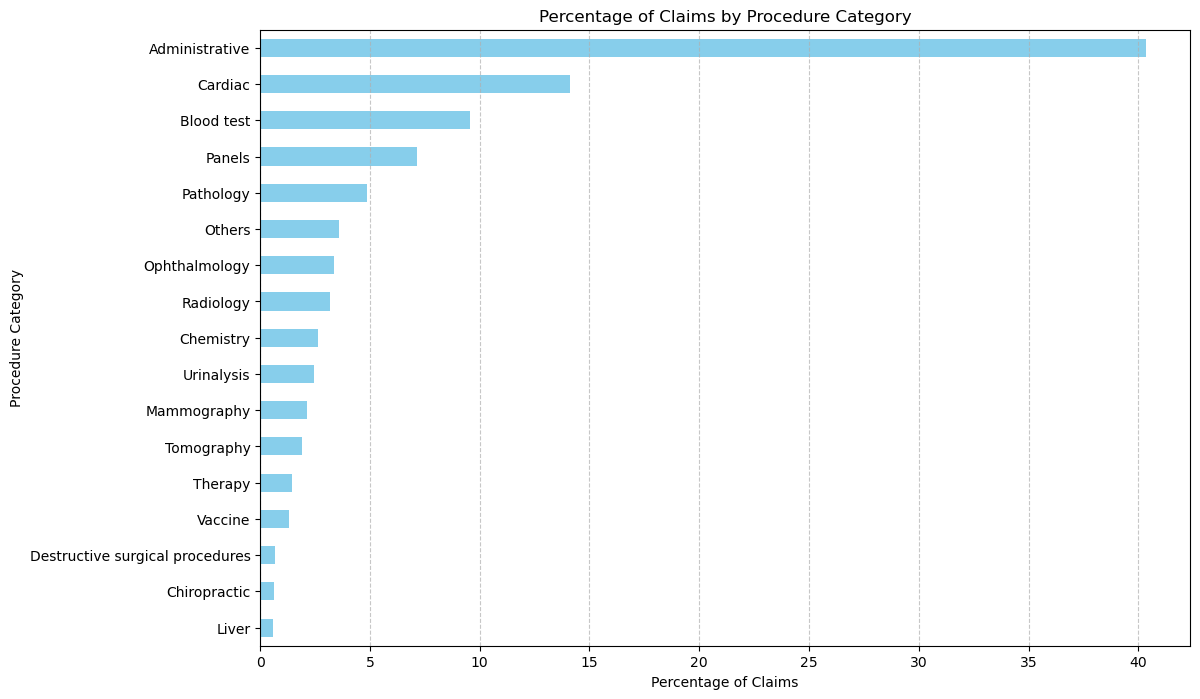

In [141]:
import matplotlib.pyplot as plt

# Create a Horizontal Bar Chart of Procedure Categories
# Group by 'category' and calculate the percentage of claims
category_share_df = medicare_df.groupby('category').agg({'claim_id': 'nunique'}).rename(columns={'claim_id': 'claim_count'})
category_share_df['claim_percentage'] = (category_share_df['claim_count'] / category_share_df['claim_count'].sum()) * 100

# Plot a horizontal bar chart
plt.figure(figsize=(12, 8))
category_share_df.sort_values('claim_percentage', ascending=True)['claim_percentage'].plot(kind='barh', color='skyblue')
plt.xlabel('Percentage of Claims')
plt.ylabel('Procedure Category')
plt.title('Percentage of Claims by Procedure Category')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

Q1. Based on the trends for the share of CVM claims as a percentage of total claims over the years 2016 through 2018, what are some business insights you can gather? What are some additional analyses you could do based on these trends?

Analysis #1. Find market share of each top procedure category on a yearly level

In [142]:
total_num_uniq_cardiac_clm_by_year_df = cardiac_uniq_df.groupby('claim_year').agg(
    cardiac_clm_count=('claim_id', 'nunique')
)
total_num_uniq_cardiac_clm_by_year_df

,cardiac_clm_count
claim_year,
2016,2318
2017,2602
2018,3129


In [153]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load Claims Header dataset
parta_claims_header_raw_df = pd.read_csv(r"C:/Users/edidi/Downloads/inputs_datasets/parta_claims_header_raw (1).csv")
parta_claims_header_df = parta_claims_header_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'atndg_prvdr_npi_num', 
    'clm_from_dt', 'prncpl_dgns_cd', 'clm_pmt_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'atndg_prvdr_npi_num': 'npi_id'
    }
)

# Add claim_year column to Claims Header dataset
parta_claims_header_df['claim_date'] = pd.to_datetime(parta_claims_header_df['claim_date'], errors='coerce')
parta_claims_header_df['claim_year'] = parta_claims_header_df['claim_date'].dt.year

# Load Claims Revenue Center dataset
parta_claims_revenue_center_detail_raw_df = pd.read_csv(
    "C:/Users/edidi/Downloads/inputs_datasets/parta_claims_revenue_center_detail_raw (1).csv", low_memory=False
)
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_from_dt',
    'clm_line_hcpcs_cd', 'clm_line_cvrd_pd_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code'
    }
)

# Add claim_year column to Claims Revenue Center dataset
parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(parta_claims_revenue_center_detail_df['claim_date'], errors='coerce')
parta_claims_revenue_center_detail_df['claim_year'] = parta_claims_revenue_center_detail_df['claim_date'].dt.year

# Load Diagnosis dataset
parta_diagnosis_code_raw_df = pd.read_csv(r"C:\Users\edidi\Downloads\inputs_datasets\parta_diagnosis_code_raw  (1).csv")
parta_diagnosis_code_df = parta_diagnosis_code_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_thru_dt', 'clm_dgns_cd'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_thru_dt': 'claim_date'
    }
)

# Add claim_year column to Diagnosis dataset
parta_diagnosis_code_df['claim_date'] = pd.to_datetime(parta_diagnosis_code_df['claim_date'], errors='coerce')
parta_diagnosis_code_df['claim_year'] = parta_diagnosis_code_df['claim_date'].dt.year

# Load DME dataset
partb_dme_raw_df = pd.read_csv(r"C:\Users\edidi\Downloads\inputs_datasets\partb_dme_raw  (1).csv")
partb_dme_df = partb_dme_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'ordrg_prvdr_npi_num',
    'clm_from_dt', 'clm_line_hcpcs_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'ordrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code',
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)

# Load Physicians dataset
partb_physicians_raw_df = pd.read_csv(r"C:\Users\edidi\Downloads\inputs_datasets\partb_physicians_raw (1).csv")
partb_physicians_df = partb_physicians_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'rndrg_prvdr_npi_num', 'clm_from_dt', 
    'clm_line_hcpcs_cd', 'clm_line_dgns_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'rndrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code', 
        'clm_line_dgns_cd': 'diagnosis_code', 
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)

# Define unique claims from all datasets and merge
claims_header_unique_claims_df = parta_claims_header_df[['claim_id', 'claim_year']].drop_duplicates()
claims_header_unique_claims_df['header'] = 1
revenue_center_unique_claims_df = parta_claims_revenue_center_detail_df[['claim_id', 'claim_year']].drop_duplicates()
revenue_center_unique_claims_df['revenue'] = 1
diagnosis_unique_claims_df = parta_diagnosis_code_df[['claim_id']].drop_duplicates()
diagnosis_unique_claims_df['diagnosis'] = 1
dme_unique_claims_df = partb_dme_df[['claim_id']].drop_duplicates()
dme_unique_claims_df['dme'] = 1
physicians_unique_claims_df = partb_physicians_df[['claim_id']].drop_duplicates()
physicians_unique_claims_df['physicians'] = 1

joined_df1 = pd.merge(claims_header_unique_claims_df, revenue_center_unique_claims_df, on=['claim_id', 'claim_year'], how='outer')
joined_df2 = pd.merge(joined_df1, diagnosis_unique_claims_df, on='claim_id', how='outer')
joined_df3 = pd.merge(joined_df2, dme_unique_claims_df, on='claim_id', how='outer')
claims_df = pd.merge(joined_df3, physicians_unique_claims_df, on='claim_id', how='outer')

# Load the HCPCS codes for blood tests
hcpcs_code_100_df = pd.DataFrame({
    'hcpcs_code': [
        '36415', '99214', '99213', '80053', '85025', 
        '80061', '84443', '83036', '80048', '93010'
    ],
    'category': ['Blood test'] * 5 + ['Other'] * 5
})

# Filter the dataset for blood test related records
blood_test_uniq_df = hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Blood test']

# Join the filtered blood test data with the claims data
blood_test_claims_df = pd.merge(blood_test_uniq_df, parta_claims_revenue_center_detail_df, on='hcpcs_code', how='inner')

# Group by claim year and count unique claim ids
total_num_uniq_blood_test_clm_by_year_df = blood_test_claims_df.groupby('claim_year').agg(
    blood_test_clm_count=('claim_id', 'nunique')
)

# Display the result
print(total_num_uniq_blood_test_clm_by_year_df)


            blood_test_clm_count
claim_year                      
2016                        1235
2017                        1323
2018                        1326


In [154]:
total_num_uniq_panels_clm_by_year_df = panels_uniq_df.groupby('claim_year').agg(
    panels_clm_count=('claim_id', 'nunique')
)
total_num_uniq_panels_clm_by_year_df

,panels_clm_count
claim_year,
2016,1174
2017,1358
2018,1538


In [155]:
total_num_uniq_chemistry_clm_by_year_df = chemistry_uniq_df.groupby('claim_year').agg(
    chemistry_clm_count=('claim_id', 'nunique')
)
total_num_uniq_chemistry_clm_by_year_df

,chemistry_clm_count
claim_year,
2016,422
2017,480
2018,612


Find total claim count by year

In [156]:
total_num_uniq_clm_by_year_df = medicare_df.groupby('claim_year').agg(
    total_clm_count=('claim_id', 'nunique')
)
total_num_uniq_clm_by_year_df

,total_clm_count
claim_year,
2016,24835
2017,27691
2018,32165


Combine all counts into one DF

In [157]:
clm_count_by_year_cat_df = total_num_uniq_cardiac_clm_by_year_df.join(
    total_num_uniq_blood_test_clm_by_year_df
).join(
    total_num_uniq_panels_clm_by_year_df
).join(
    total_num_uniq_chemistry_clm_by_year_df
).join(
    total_num_uniq_clm_by_year_df
)
clm_count_by_year_cat_df

,cardiac_clm_count,blood_test_clm_count,panels_clm_count,chemistry_clm_count,total_clm_count
claim_year,,,,,
2016,2318,NaN,1174,422,24835
2017,2602,NaN,1358,480,27691
2018,3129,NaN,1538,612,32165


Get number of all other claims besides the top 4 categories per year

In [158]:
clm_count_by_year_cat_df['other_clm_count'] = clm_count_by_year_cat_df['total_clm_count']\
    -clm_count_by_year_cat_df['cardiac_clm_count']\
    -clm_count_by_year_cat_df['blood_test_clm_count']\
    -clm_count_by_year_cat_df['panels_clm_count']\
    -clm_count_by_year_cat_df['chemistry_clm_count']
clm_count_by_year_cat_df

,cardiac_clm_count,blood_test_clm_count,panels_clm_count,chemistry_clm_count,total_clm_count,other_clm_count
claim_year,,,,,,
2016,2318,NaN,1174,422,24835,NaN
2017,2602,NaN,1358,480,27691,NaN
2018,3129,NaN,1538,612,32165,NaN


Get percentage of claims for each category including others

In [160]:
# Make a copy of the original DataFrame
clm_count_by_year_cat_perc_df = clm_count_by_year_cat_df.copy()

# Calculate percentages and handle possible NaN values by filling with 0 before converting to integer
clm_count_by_year_cat_perc_df['cardiac_clm_perc'] = (
    (clm_count_by_year_cat_perc_df['cardiac_clm_count'] / clm_count_by_year_cat_perc_df['total_clm_count'] * 100)
).round().fillna(0).astype(int)

clm_count_by_year_cat_perc_df['blood_test_clm_perc'] = (
    (clm_count_by_year_cat_perc_df['blood_test_clm_count'] / clm_count_by_year_cat_perc_df['total_clm_count'] * 100)
).round().fillna(0).astype(int)

clm_count_by_year_cat_perc_df['panels_clm_perc'] = (
    (clm_count_by_year_cat_perc_df['panels_clm_count'] / clm_count_by_year_cat_perc_df['total_clm_count'] * 100)
).round().fillna(0).astype(int)

clm_count_by_year_cat_perc_df['chemistry_clm_perc'] = (
    (clm_count_by_year_cat_perc_df['chemistry_clm_count'] / clm_count_by_year_cat_perc_df['total_clm_count'] * 100)
).round().fillna(0).astype(int)

clm_count_by_year_cat_perc_df['other_clm_perc'] = (
    (clm_count_by_year_cat_perc_df['other_clm_count'] / clm_count_by_year_cat_perc_df['total_clm_count'] * 100)
).round().fillna(0).astype(int)

# Rename columns for easier reference
clm_count_by_year_cat_perc_df = clm_count_by_year_cat_perc_df.rename(
    columns={
        'cardiac_clm_perc': 'cardiac',
        'blood_test_clm_perc': 'blood_test',
        'panels_clm_perc': 'panels',
        'chemistry_clm_perc': 'chemistry',
        'other_clm_perc': 'other'
    }
)[[
    'cardiac', 'blood_test', 'panels', 'chemistry', 'other'
]]

# Display the updated DataFrame
clm_count_by_year_cat_perc_df


,cardiac,blood_test,panels,chemistry,other
claim_year,,,,,
2016,9,0,5,2,0
2017,9,0,5,2,0
2018,10,0,5,2,0



Create a 100% stacked bar graph

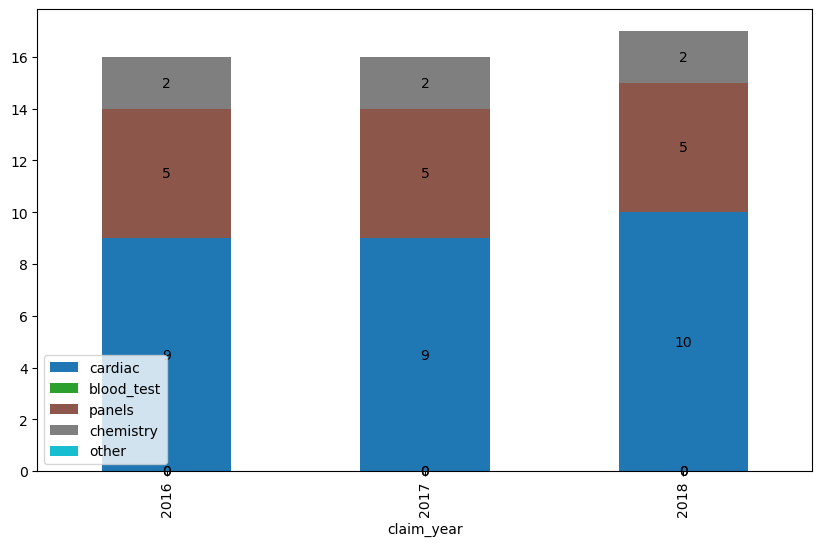

In [162]:
clm_count_by_year_cat_perc_100_stacked_bar_graph = clm_count_by_year_cat_perc_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))
for container in clm_count_by_year_cat_perc_100_stacked_bar_graph.containers:
    clm_count_by_year_cat_perc_100_stacked_bar_graph.bar_label(container, label_type='center')

Key Business Insights:

1. Growth or Sales Focus Areas

Cardiac claims have consistently been a significant part of overall claims. This makes cardiac treatments and products a key focus. Sales teams should prioritize reaching out to cardiology healthcare providers (HCPs).

Messaging Strategy: Messaging should focus on advancements and cost-effectiveness in cardiac care products, while also highlighting the support available for cardiac patients to meet ongoing demand.

2. Sales Tactics

Highlighting Key Value Propositions: Sales reps should be ready to clearly communicate the benefits of cardiac care products, including efficiency, clinical benefits, and patient outcomes.

Consider tailoring messages each year based on trends. For example, the slight increase in cardiac claims in 2018 could be tied to better HCP outreach or changes in market needs.

Focus on Chemistry and Panels: The steady claims for "panels" and "chemistry" each year show stable growth potential. Sales reps can be trained to bundle these tests or services, increasing engagement, improving patient care, and driving sales.

3. Product or Service Offerings

Addressing Blood Test Underutilization: Blood tests seem to be underutilized, likely due to a lack of awareness. Marketing should evaluate if HCPs understand the relevance and benefits of these tests. Awareness campaigns should aim to help HCPs know when and why these tests are important.

Creating Bundled Offerings: Since "panels" and "chemistry" claims are consistent, bundling multiple diagnostics into a package could boost sales. Sales tactics should emphasize the convenience and cost-effectiveness of these bundles for HCPs.

4. Enhancing Patient Experience

Raising Awareness of Diagnostic Benefits: Marketing should ensure that both patients and HCPs understand the benefits of diagnostics, especially blood tests and panel diagnostics, which are underutilized. Direct-to-consumer campaigns can help highlight the importance of these diagnostics for patient health and drive demand.

Educational Programs: Consider educational programs for patients and HCPs that explain the value of various diagnostic tests, especially for preventive health. Highlight the role of chemistry tests in early detection and monitoring.

5. Targeted Campaigns

Driving Cardiac Claims Growth: The consistent data on cardiac claims shows an opportunity for targeted campaigns. These campaigns should highlight cardiac risk factors and the importance of ongoing monitoring for at-risk patients.

Incentivizing HCPs: Consider incentivizing HCPs to recommend underutilized diagnostics, like blood tests, to increase usage where claims are low.

6. Strategic Resource Allocation for Sales Teams

Cardiac Focus: Allocate more sales resources to the cardiac segment, focusing on promoting existing products or expanding the product line.

Blood Tests: Invest in training the sales team to effectively communicate the benefits of blood tests and develop strategies to address their underutilization.

Q2. Evaluate the HCP behavior in context of claim volume from 2016-2018. How many HCPs are submitting 1 CVM claim; how many HCPs are associated with more than 10 claims, etc.? Once you perform this analysis, explain how this trend can influence the sales force deployment. That is, how would you segment the HCPs and how would you allocate In-Person (sales force) vs Non-Personal Promotions (NPP, i.e. Emails, Social Media, Digital etc.) efforts?

Empty DataFrame
Columns: [npi_id, claim_count]
Index: []
                                Segment  Number of HCPs
0               Disease Aware (1 Claim)               0
1                Trialists (2-4 Claims)               0
2             Rising Stars (5-9 Claims)               0
3  High-Volume Prescribers (10+ Claims)               0


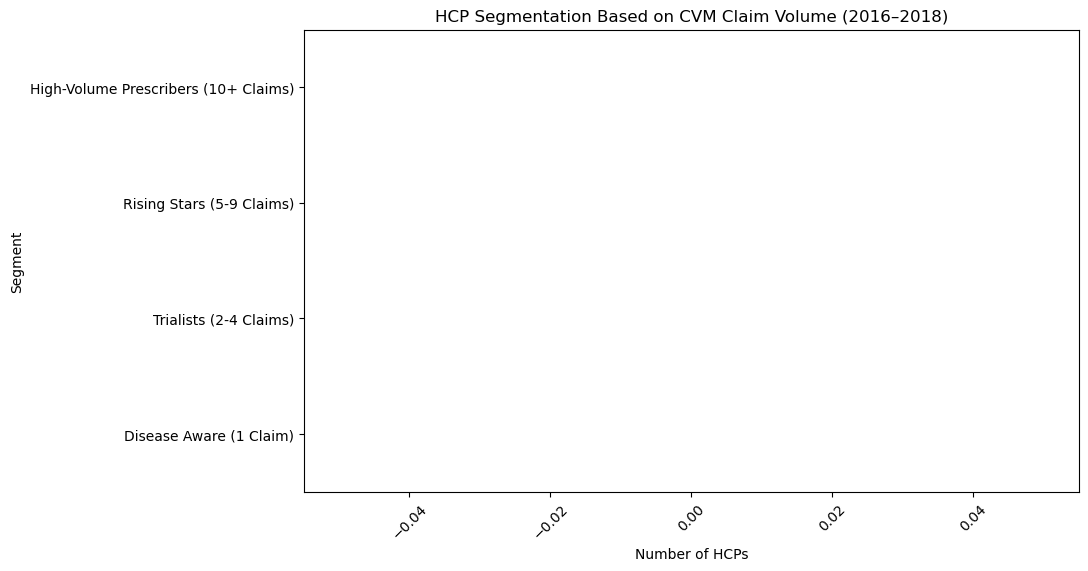

In [165]:
# Filter CVM claims based on the 'category' column (Cardiac)
cvm_claims = medicare_df[medicare_df['hcpcs_code'].isin(hcpcs_code_100_df.query("category == 'Cardiac'")['hcpcs_code'])]

# Group by 'npi_id' and count the number of CVM claims per provider
hcp_claims = cvm_claims.groupby('npi_id').size().reset_index(name='claim_count')

# Display the grouped DataFrame to confirm structure
print(hcp_claims.head())

# Define the segmentation logic based on the claim_count
hcp_claims['segment'] = pd.cut(
    hcp_claims['claim_count'],
    bins=[0, 1, 4, 9, float('inf')],
    labels=['Disease Aware (1 Claim)', 'Trialists (2-4 Claims)', 
            'Rising Stars (5-9 Claims)', 'High-Volume Prescribers (10+ Claims)']
)

# Count the number of HCPs in each segment
hcp_segment_counts = hcp_claims['segment'].value_counts().reset_index()
hcp_segment_counts.columns = ['Segment', 'Number of HCPs']

# Display the segmentation result
print(hcp_segment_counts)

# Plot the segmentation result as a bar chart
hcp_segment_counts.plot(
    kind='barh', x='Segment', y='Number of HCPs', legend=False, figsize=(10, 6)
)

# Add title and labels
plt.title('HCP Segmentation Based on CVM Claim Volume (2016–2018)')
plt.ylabel('Segment')
plt.xlabel('Number of HCPs')
plt.xticks(rotation=45)
plt.show()


Q3. Evaluate the Patient Age demographics in the context of claim volume from 2016-2018. Bucket the patients into groups based on their age and explain the trends. How would you position the Marketing Budgets and the Promotions with respect to the changing landscape of the CVM claims and the respective patient segments?

  Age Group  Number of Claims
0      0-18                 0
1     19-35              1112
2     36-50              3171
3     51-65             16821
4     66-80             46295
5       80+             17292


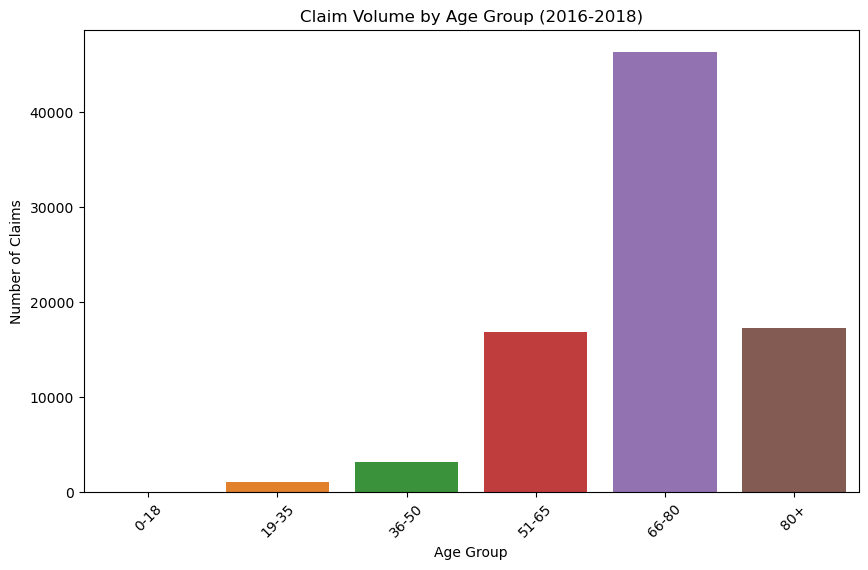

In [168]:
# Filter data for years 2016-2018
# Convert 'claim_date' to datetime if needed
medicare_df['claim_date'] = pd.to_datetime(medicare_df['claim_date'], errors='coerce')

# Filter for years 2016-2018
claims_df_filtered = medicare_df[(medicare_df['claim_date'].dt.year >= 2016) & 
                                 (medicare_df['claim_date'].dt.year <= 2018)]

# Convert 'patient_birth_date' to datetime if needed
claims_df_filtered['patient_birth_date'] = pd.to_datetime(claims_df_filtered['patient_birth_date'], errors='coerce')

# Calculate age at the time of claim
claims_df_filtered['patient_age'] = claims_df_filtered['claim_date'].dt.year - claims_df_filtered['patient_birth_date'].dt.year

# Handle cases where the claim date is earlier in the year than the birthdate (e.g., birthdays not yet reached in the claim year)
claims_df_filtered['patient_age'] -= ((claims_df_filtered['claim_date'].dt.month < claims_df_filtered['patient_birth_date'].dt.month) |
                                      ((claims_df_filtered['claim_date'].dt.month == claims_df_filtered['patient_birth_date'].dt.month) & 
                                       (claims_df_filtered['claim_date'].dt.day < claims_df_filtered['patient_birth_date'].dt.day))).astype(int)

# Create age buckets
bins = [0, 18, 35, 50, 65, 80, 100]
labels = ['0-18', '19-35', '36-50', '51-65', '66-80', '80+']
claims_df_filtered['age_bucket'] = pd.cut(claims_df_filtered['patient_age'], bins=bins, labels=labels)

# Calculate claim volume for each age group
age_group_claims = claims_df_filtered['age_bucket'].value_counts().sort_index()

# Display the results
age_group_claims_df = age_group_claims.reset_index()
age_group_claims_df.columns = ['Age Group', 'Number of Claims']
print(age_group_claims_df)

# Plot the trends
plt.figure(figsize=(10, 6))
sns.barplot(x=age_group_claims.index, y=age_group_claims.values)
plt.xlabel('Age Group')
plt.ylabel('Number of Claims')
plt.title('Claim Volume by Age Group (2016-2018)')
plt.xticks(rotation=45)
plt.show()


Anaylses:

Based on the chart, the analysis of claim volume from 2016 to 2018 shows clear trends across different age groups:

0-18 Age Group:

This group has very few claims, suggesting that cardiovascular and metabolic conditions are uncommon among younger individuals. The focus here could be on prevention and education for parents.

19-35 Age Group:
This age group also has a low claim volume. Although CVM conditions aren't very common, it's still valuable to raise awareness about healthy lifestyle choices, exercise, and good habits to prevent issues later in life.

36-50 Age Group:
There's a slight increase in claims compared to younger groups, but overall, the volume is still relatively low. This may indicate the start of age-related health risks, making early screening and lifestyle modification campaigns useful.

51-65 Age Group:
Claims rise significantly in this age group. It's common for people aged 51-65 to experience more health concerns, including cardiovascular and metabolic issues. Marketing should focus on promoting screenings, educating about risk factors, and providing access to preventive healthcare.

66-80 Age Group:
This group has the highest number of claims by far. Since individuals in this age range are at high risk for CVM conditions, a significant portion of the marketing budget should be directed here. The focus should be on treatment options, chronic disease management, and ongoing support for cardiovascular health.

80+ Age Group:
Although there is a drop in claims compared to the 66-80 age group, the volume remains significant. Marketing efforts for this group should highlight treatment options, improving quality of life, and caregiver support to ensure patients receive the care they need.

Marketing Budget and Promotion Recommendations

Focus on 51+ Age Group:
Most of the marketing budget should be allocated to people aged 51 and above, especially the 66-80 group, as they have the highest claim volume. Promotions should emphasize regular health check-ups, early detection, lifestyle interventions, and access to treatments.

Educational Campaigns for Younger Groups (0-50):
For the younger population, focus on education and prevention. Campaigns should highlight the importance of healthy eating, physical activity, and regular screenings to help prevent CVM conditions. Using digital platforms like social media and health blogs is an effective way to reach this demographic.

Targeted Health Services for 51-65:
For the 51-65 age group, promotions should highlight the availability of cardiovascular screenings, medical consultations, and wellness programs. Partner with healthcare providers to offer discounts or packages on diagnostic tests and treatments.

Chronic Disease Management for 66+:
Target the 66-80 and 80+ age groups with services that support chronic disease management, including information on medications, treatments, and healthcare facilities. Promotions can also include caregiver support programs and home-based healthcare services.

Cross-Channel Engagement:
Use a mix of traditional and digital marketing strategies to effectively reach different age groups. For older populations, consider traditional media like TV, print, and community events, while younger groups can be reached through social media and wellness apps.

